In [174]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import sem
import pprint
from matplotlib.pyplot import pie, axis, show

In [176]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [177]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Calic, Mr. Petar",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# CLEANING THE DATA

In [178]:
# drop columns with large number of blanks (Cabin)/random unique identifier (PassengerId, Ticket)
df = df.drop(columns=['PassengerId', 'Cabin', 'Ticket'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [179]:
df.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,"Calic, Mr. Petar",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [180]:
#complete missing age with median
df['Age'].fillna(df['Age'].median(), inplace = True)
df.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,"Calic, Mr. Petar",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN


In [181]:
#complete 2 missing Embarked data with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [234]:
df.describe(include = 'all')

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,2.102694,1.505051,0.361392,0.602694,1.728395
std,0.486592,0.836071,0.477990,7.622841,1.118148,0.635673,0.489615,1.030039
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,1.000000,0.500000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,3.000000,2.000000,1.000000,5.000000


In [182]:
# Drop any remaining null rows; still at 891 so no additional rows were dropped
df = df.dropna()
df.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,"Calic, Mr. Petar",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN


In [183]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


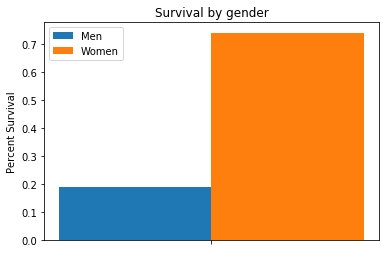

In [184]:
N = 1
men_means = (0.1889)
women_means = (0.7420)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='Men')
plt.bar(ind + width, women_means, width,
    label='Women')

plt.ylabel('Percent Survival')
plt.title('Survival by gender')

plt.xticks(ind + width / 2, ())
plt.legend(loc='best')
plt.show()

In [185]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


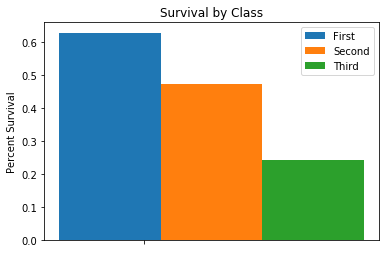

In [186]:
N = 1
first_means = (0.6296)
second_means = (0.4728)
third_means = (0.2424)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, first_means, width, label='First')
plt.bar(ind + width, second_means, width,
        label='Second')
plt.bar(ind + width + width, third_means, width, label='Third')

plt.ylabel('Percent Survival')
plt.title('Survival by Class')

plt.xticks(ind + width / 3, ())
plt.legend(loc='best')
plt.show()

In [187]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


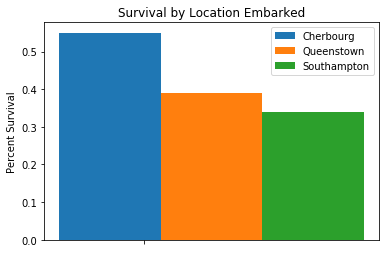

In [188]:
N = 1
Cherbourg_means = (0.55)
Queenstown_means = (0.39)
Southampton_means = (0.34)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, Cherbourg_means, width, label='Cherbourg')
plt.bar(ind + width, Queenstown_means, width,
        label='Queenstown')
plt.bar(ind + width + width, Southampton_means, width, label='Southampton')

plt.ylabel('Percent Survival')
plt.title('Survival by Location Embarked')

plt.xticks(ind + width / 3, ())
plt.legend(loc='best')
plt.show()

In [191]:
# Creating numerical values for gender
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C


In [192]:
# Creating numerical values for Embarked
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,0
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,23.4500,0
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,1


In [193]:
# Binning Age
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[df['Age'] > 64, 'Age']
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,1.0,0,0,13.0000,0
887,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,30.0000,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,1,2,23.4500,0
889,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,30.0000,1


In [194]:
# df[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [195]:
# Binning Fare
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,3,1
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,3,0
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,1.0,0,0,1,0
887,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,2,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,1,2,2,0
889,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,2,1


In [196]:
# Figuring out Sibsp and Parch
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,0,0,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,3,1,2,0
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,1,0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,3,0,2,0
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,1.0,0,0,1,0,1,1
887,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,2,0,1,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,1,2,2,0,4,0
889,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,2,1,1,1


In [197]:
# drop Parch/SibSp/FamilySize in favor of IsAlone
df = df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,1.0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,3,1,0
2,1,3,"Heikkinen, Miss. Laina",1,1.0,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,3,0,0
4,0,3,"Allen, Mr. William Henry",0,2.0,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,1.0,1,0,1
887,1,1,"Graham, Miss. Margaret Edith",1,1.0,2,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,2,0,0
889,1,1,"Behr, Mr. Karl Howell",0,1.0,2,1,1


In [198]:
# Working with Name to boil it down to something useful
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",0,1.0,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,3,1,0,3
2,1,3,"Heikkinen, Miss. Laina",1,1.0,1,0,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,3,0,0,3
4,0,3,"Allen, Mr. William Henry",0,2.0,1,0,1,1


In [199]:
# drop Name in favor of Title
df = df.drop(['Name'], axis=1)

In [200]:
# Set features. This will also be used as your X values.
selected_features = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone', 'Title']]
selected_features

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,3,0,1.0,0,0,0,1
1,1,1,2.0,3,1,0,3
2,3,1,1.0,1,0,1,2
3,1,1,2.0,3,0,0,3
4,3,0,2.0,1,0,1,1
...,...,...,...,...,...,...,...
886,2,0,1.0,1,0,1,5
887,1,1,1.0,2,0,1,2
888,3,1,1.0,2,0,0,2
889,1,0,1.0,2,1,1,1


In [201]:
X = selected_features
y = df[['Survived']]
print(X.shape, y.shape)

(891, 7) (891, 1)


In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape)

(668, 7) (668, 1)


In [203]:
print(X_test.shape, y_test.shape)

(223, 7) (223, 1)


In [204]:
X_train

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
298,1,0,1.0,2,0,1,1
884,3,0,1.0,0,0,1,1
247,2,1,1.0,2,0,0,3
478,3,0,1.0,0,0,1,1
305,1,0,0.0,3,0,0,4
...,...,...,...,...,...,...,...
106,3,1,1.0,0,0,1,2
270,1,0,1.0,2,0,1,1
860,3,0,2.0,1,0,0,1
435,1,1,0.0,3,0,0,2


In [205]:
X_test

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
709,3,0,1.0,2,1,0,4
439,2,0,1.0,1,0,1,1
840,3,0,1.0,1,0,1,1
720,2,1,0.0,3,0,0,2
39,3,1,0.0,1,1,0,2
...,...,...,...,...,...,...,...
880,2,1,1.0,2,0,0,3
425,3,0,1.0,0,0,1,1
101,3,0,1.0,0,0,1,1
199,2,1,1.0,1,0,1,2


# DECISION TREE

In [206]:
# # DECISION TREE
# from sklearn import tree
# # Create and score a decision tree classifier
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)

In [207]:
# #DECISION TREE TRAIN THE MODEL
# print('Train score: {}'.format(clf.score(X_train, y_train)))
# print('Test score: {}'.format(clf.score(X_test, y_test)))

# RANDOM FOREST

In [208]:
# # RANDOM FOREST
# from sklearn.ensemble import RandomForestClassifier
# # Create a random forest classifier
# rf = RandomForestClassifier(n_estimators=200)
# rf = rf.fit(X_train, y_train)

In [209]:
# #RANDOM FOREST TRAIN THE MODEL
# print(f"Training Data Score: {rf.score(X_train, y_train)}")
# print(f"Testing Data Score: {rf.score(X_test, y_test)}")

In [210]:
# #RANDOM FOREST FEATURE IMPORTANCE
# # Random Forests in sklearn will automatically calculate feature importance
# importances = rf.feature_importances_
# importances

In [211]:
# #RANDOM FOREST SORT THE FEATURES
# # We can sort the features by their importance
# sorted(zip(rf.feature_importances_, X_train), reverse=True)

# RFC GRIDSEARCH AND CLASSIFICATION REPORT

In [212]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model

In [213]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'max_depth': [3, 5, 7],
#               'min_samples_leaf': [1, 4]}
# grid = GridSearchCV(model, param_grid, verbose=3)

In [214]:
# # Fit the model using the grid search estimator. 
# # This will take the SVC model and try each combination of parameters
# grid.fit(X_train, y_train)

In [215]:
# print(grid.best_params_)
# print(grid.best_score_)

In [216]:
# predictions = grid.predict(X_test)

In [217]:
# # Calculate Random Forest classification report
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions))

# LOGISTIC REGRESSION

In [218]:
# #LOGISTIC REGRESSION
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(max_iter=1000)
# classifier

In [219]:
# #LOGISTIC REGRESSION
# classifier.fit(X_train, y_train)

In [220]:
# #LOGISTIC REGRESSION
# print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

# K NEAREST NEIGHBOR

In [221]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 1, Train/Test Score: 0.826/0.713
k: 3, Train/Test Score: 0.847/0.776
k: 5, Train/Test Score: 0.853/0.825
k: 7, Train/Test Score: 0.850/0.812


C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 9, Train/Test Score: 0.837/0.803
k: 11, Train/Test Score: 0.832/0.812
k: 13, Train/Test Score: 0.826/0.803
k: 15, Train/Test Score: 0.816/0.794
k: 17, Train/Test Score: 0.814/0.807
k: 19, Train/Test Score: 0.813/0.794


C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


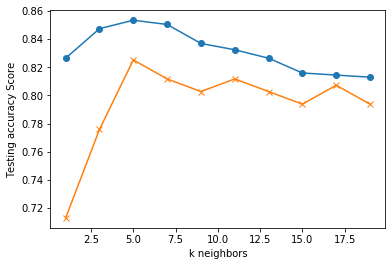

In [222]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [223]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,0,1.0,0,0,0,1
1,1,1,1,2.0,3,1,0,3
2,1,3,1,1.0,1,0,1,2
3,1,1,1,2.0,3,0,0,3
4,0,3,0,2.0,1,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,1,0,1,5
887,1,1,1,1.0,2,0,1,2
888,0,3,1,1.0,2,0,0,2
889,1,1,0,1.0,2,1,1,1


# KNN GRIDSEARCH AND CLASSIFICATION REPORT

In [224]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

k=5 Test Acc: 0.825


C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [225]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [226]:
from sklearn.model_selection import GridSearchCV
param_grid = {'leaf_size': [30, 100]}
# param_grid = {'n_estimators': [100, 1000]}
#               'gamma': [0.01, 0.05, 0.1, 0.5]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [227]:
grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was pas

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] leaf_size=30 ....................................................
[CV] ........................ leaf_size=30, score=0.821, total=   0.0s
[CV] leaf_size=30 ....................................................
[CV] ........................ leaf_size=30, score=0.836, total=   0.0s
[CV] leaf_size=30 ....................................................
[CV] ........................ leaf_size=30, score=0.746, total=   0.0s
[CV] leaf_size=30 ....................................................
[CV] ........................ leaf_size=30, score=0.827, total=   0.0s
[CV] leaf_size=30 ....................................................
[CV] ........................ leaf_size=30, score=0.857, total=   0.0s
[CV] leaf_size=100 ...................................................
[CV] ....................... leaf_size=100, score=0.813, total=   0.0s
[CV] leaf_size=100 ...................................................


C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... leaf_size=100, score=0.828, total=   0.1s
[CV] leaf_size=100 ...................................................
[CV] ....................... leaf_size=100, score=0.754, total=   0.0s
[CV] leaf_size=100 ...................................................
[CV] ....................... leaf_size=100, score=0.812, total=   0.0s
[CV] leaf_size=100 ...................................................
[CV] ....................... leaf_size=100, score=0.805, total=   0.0s


C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ESC\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
C:\Users\ESC\An

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={'leaf_size': [30, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [228]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 30}
0.817439120188531


In [229]:
predictions = grid.predict(X_test)

In [230]:
#Calculate KNearest Neighbor Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       134
           1       0.77      0.81      0.79        89

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [231]:
print(df['Survived'].value_counts)
# submit = data_val[['PassengerId','Survived']]
# print('Validation Data Distribution: \n', df['Survived'].value_counts(normalize = True))

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>


In [232]:
print(df['Sex'=1].value_counts)

SyntaxError: invalid syntax (<ipython-input-232-4611bfe9626d>, line 1)